In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv('/train_features.csv')
train_labels=pd.read_csv('/train_labels.csv')
test=pd.read_csv('/test_features.csv')
submission=pd.read_csv('/sample_submission.csv')

In [ ]:
df = pd.merge(train,train_labels, on='id', how='outer')

In [44]:
df.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc,exercise
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell),1
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell),1
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell),1
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell),1
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell),1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875000 entries, 0 to 1874999
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   time        int64  
 2   acc_x       float64
 3   acc_y       float64
 4   acc_z       float64
 5   gy_x        float64
 6   gy_y        float64
 7   gy_z        float64
 8   label       int64  
 9   label_desc  object 
 10  exercise    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 171.7+ MB


## 기초 통계량 파악

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1875000.0,1562.000000,902.109990,0.000000,781.000000,1562.000000,2343.000000,3124.000000
time,1875000.0,299.500000,173.204886,0.000000,149.750000,299.500000,449.250000,599.000000
acc_x,1875000.0,-0.448968,0.717308,-8.838427,-0.962564,-0.656048,-0.000170,8.426799
acc_y,1875000.0,-0.161791,0.587202,-9.299714,-0.516302,-0.203398,0.140649,8.484622
acc_z,1875000.0,0.055715,0.472482,-8.316425,-0.212355,0.030313,0.358198,6.432668
gy_x,1875000.0,-1.307982,60.832285,-1811.126713,-20.489839,-1.421819,15.722455,1870.255994
gy_y,1875000.0,-0.433774,73.298318,-1594.255615,-18.653199,-0.264275,16.763278,2111.656826
gy_z,1875000.0,0.886410,70.633454,-1346.142960,-15.462257,-0.179864,16.418782,1255.849180
label,1875000.0,27.926720,12.885347,0.000000,26.000000,26.000000,30.000000,60.000000
exercise,1875000.0,0.514240,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000


In [46]:
df[['label', 'label_desc']].value_counts()

label  label_desc                                  
26     Non-Exercise                                    910800
8      Device on Table                                  58200
28     Plank                                            33000
60     Wall Squat                                       28800
18     Jump Rope                                        28200
                                                        ...  
53     Triceps Kickback (knee on bench) (right arm)      7800
13     Dumbbell Row (knee on bench) (right arm)          7200
12     Dumbbell Row (knee on bench) (left arm)           7200
52     Triceps Kickback (knee on bench) (left arm)       7200
0      Arm Band Adjustment                               7200
Length: 61, dtype: int64

<AxesSubplot:>

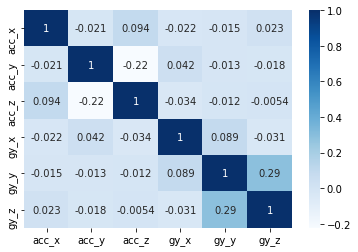

In [31]:
sns.heatmap(df[['acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']].corr(), cmap='Blues', annot=True)

## 가속도계 (acc) 분포

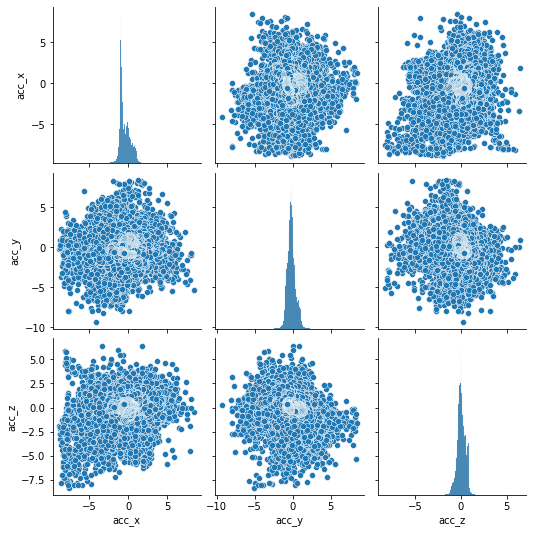

In [32]:
sns.pairplot(df[['acc_x', 'acc_y', 'acc_z']])

## 자이로스코프 (gy) 분포

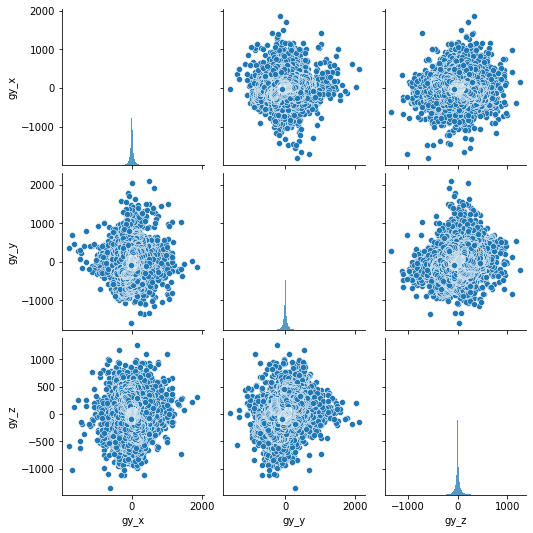

In [33]:
sns.pairplot(df[['gy_x', 'gy_y', 'gy_z']])

## 운동 상태에 따른 가속도계(acc), 자이로스코프(gy) 분포

<AxesSubplot:xlabel='exercise', ylabel='gy_z'>

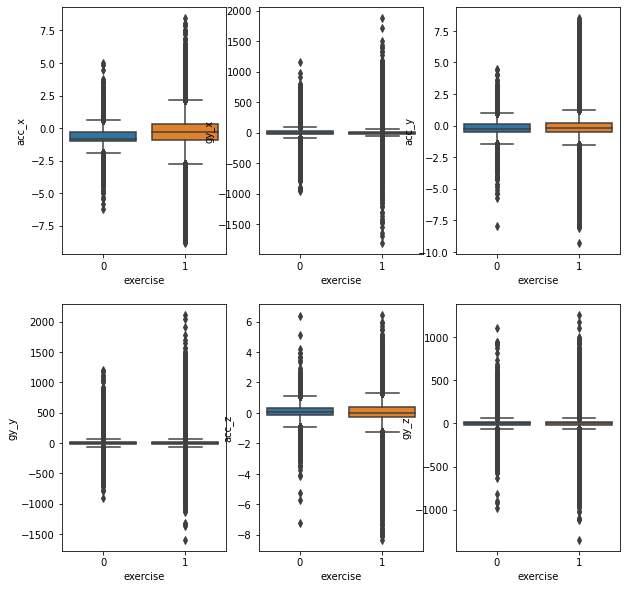

In [34]:
df['exercise'] = 1
df.loc[(df.label == 26), 'exercise'] = 0

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)


sns.boxplot(x='exercise', y='acc_x', data=df, ax=ax1)
sns.boxplot(x='exercise', y='gy_x', data=df, ax=ax2)
sns.boxplot(x='exercise', y='acc_y', data=df, ax=ax3)
sns.boxplot(x='exercise', y='gy_y', data=df, ax=ax4)
sns.boxplot(x='exercise', y='acc_z', data=df, ax=ax5)
sns.boxplot(x='exercise', y='gy_z', data=df, ax=ax6)

### 운동 동작에 따른 가속도계(acc), 자이로스코프(gy) 변화

##  Non-Exercise

In [35]:
label_26 = df[df.label==26]

group_26 = label_26.groupby(['id'])
group_26['id'].unique().head(10)

id
1      [1]
3      [3]
4      [4]
5      [5]
6      [6]
7      [7]
8      [8]
9      [9]
10    [10]
11    [11]
Name: id, dtype: object

<AxesSubplot:>

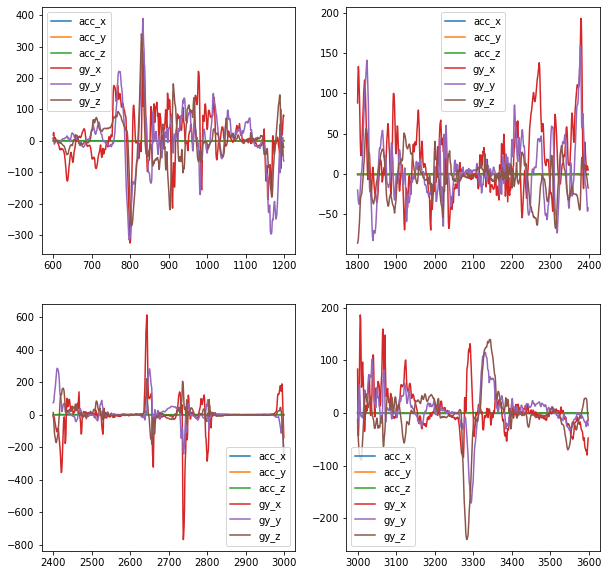

In [36]:
group26_1 = label_26[label_26.id==1]
group26_2 = label_26[label_26.id==3]
group26_3 = label_26[label_26.id==4]
group26_4 = label_26[label_26.id==5]

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3) 
ax4 = fig.add_subplot(2,2,4) 

group26_1.iloc[:,2:8].plot(ax=ax1)
group26_2.iloc[:,2:8].plot(ax=ax2)
group26_3.iloc[:,2:8].plot(ax=ax3)
group26_4.iloc[:,2:8].plot(ax=ax4)

<AxesSubplot:>

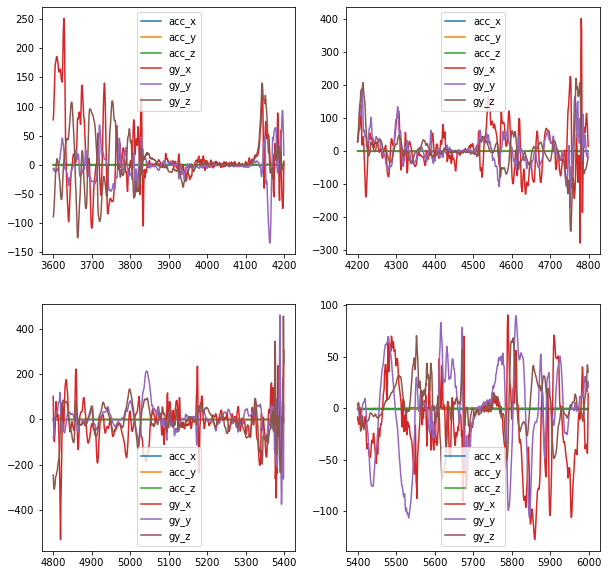

In [37]:
group26_5 = label_26[label_26.id==6]
group26_6 = label_26[label_26.id==7]
group26_7 = label_26[label_26.id==8]
group26_8 = label_26[label_26.id==9]

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3) 
ax4 = fig.add_subplot(2,2,4) 

group26_5.iloc[:,2:8].plot(ax=ax1)
group26_6.iloc[:,2:8].plot(ax=ax2)
group26_7.iloc[:,2:8].plot(ax=ax3)
group26_8.iloc[:,2:8].plot(ax=ax4)

## Device on Table

In [38]:
label_8 = df[df.label==8]

group_8 = label_8.groupby(['id'])
group_8['id'].unique().head(10)

id
41      [41]
85      [85]
88      [88]
159    [159]
191    [191]
276    [276]
294    [294]
305    [305]
334    [334]
400    [400]
Name: id, dtype: object

<AxesSubplot:>

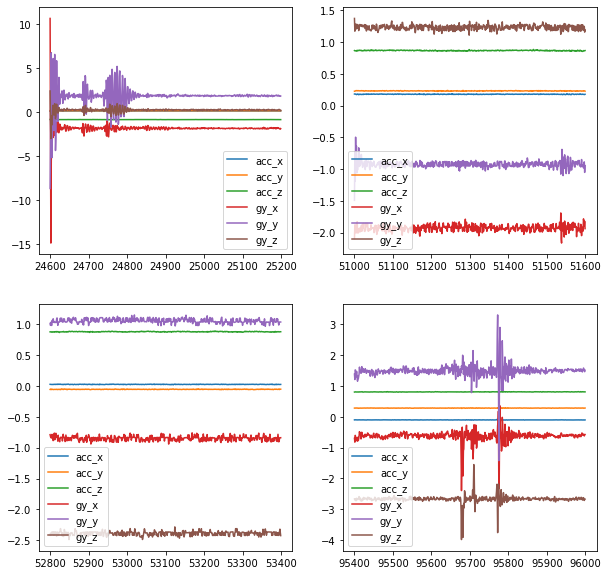

In [39]:
group8_1 = label_8[label_8.id==41]
group8_2 = label_8[label_8.id==85]
group8_3 = label_8[label_8.id==88]
group8_4 = label_8[label_8.id==159]

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3) 
ax4 = fig.add_subplot(2,2,4) 

group8_1.iloc[:,2:8].plot(ax=ax1)
group8_2.iloc[:,2:8].plot(ax=ax2)
group8_3.iloc[:,2:8].plot(ax=ax3)
group8_4.iloc[:,2:8].plot(ax=ax4)

## Plank 

In [40]:
label_28 = df[df.label==28]

group_28 = label_28.groupby(['id'])
group_28['id'].unique().head()

id
13      [13]
55      [55]
57      [57]
67      [67]
127    [127]
Name: id, dtype: object

<AxesSubplot:>

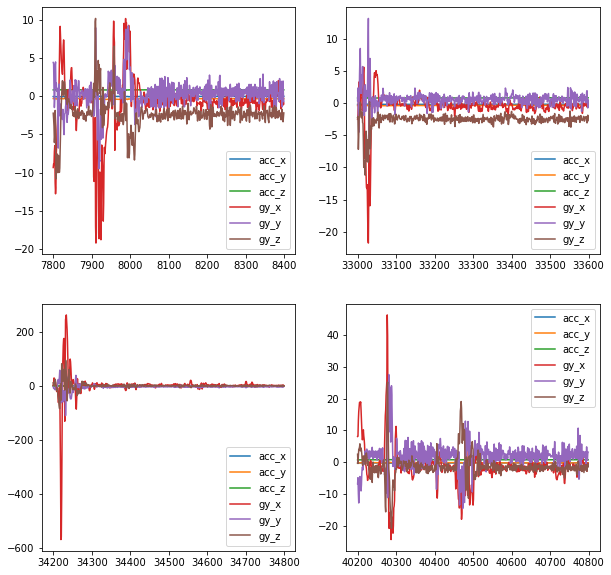

In [41]:
group28_1 = label_28[label_28.id==13]
group28_2 = label_28[label_28.id==55]
group28_3 = label_28[label_28.id==57]
group28_4 = label_28[label_28.id==67]

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3) 
ax4 = fig.add_subplot(2,2,4) 

group28_1.iloc[:,2:8].plot(ax=ax1)
group28_2.iloc[:,2:8].plot(ax=ax2)
group28_3.iloc[:,2:8].plot(ax=ax3)
group28_4.iloc[:,2:8].plot(ax=ax4)

## Wall Squat

In [42]:
label_60 = df[df.label==60]

group_60 = label_60.groupby(['id'])
group_60['id'].unique().head()

id
21      [21]
93      [93]
212    [212]
376    [376]
502    [502]
Name: id, dtype: object

<AxesSubplot:>

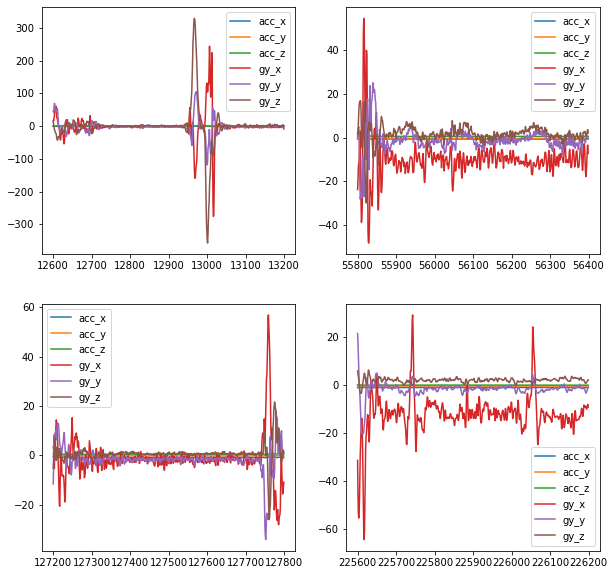

In [43]:
group60_1 = label_60[label_60.id==21]
group60_2 = label_60[label_60.id==93]
group60_3 = label_60[label_60.id==212]
group60_4 = label_60[label_60.id==376]


fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3) 
ax4 = fig.add_subplot(2,2,4) 

group60_1.iloc[:,2:8].plot(ax=ax1)
group60_2.iloc[:,2:8].plot(ax=ax2)
group60_3.iloc[:,2:8].plot(ax=ax3)
group60_4.iloc[:,2:8].plot(ax=ax4)